In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
path = "../Dataset/wine-reviews/"
file = "winemag-data-130k-v2.csv"

In [3]:
csv_130k = pd.read_csv(path + file, index_col=0)

In [4]:
csv_130k.head(1)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia


# 数据可视化和摘要
## 数据摘要  
### 标称属性
* country、province、region_1、region_2、variety、winery
* 给出每个可能聚会的频数  

#### country

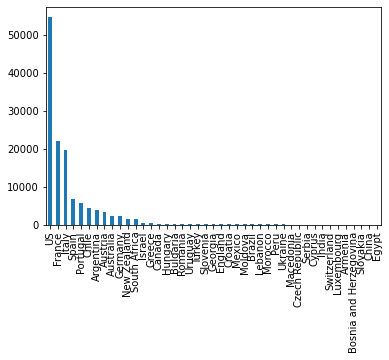

In [5]:
csv_130k['country'].value_counts().plot.bar()

#### province

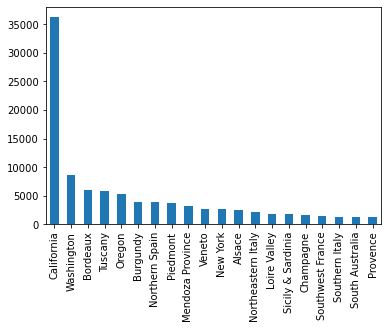

In [6]:
csv_130k['province'].value_counts().head(20).plot.bar()

#### variety

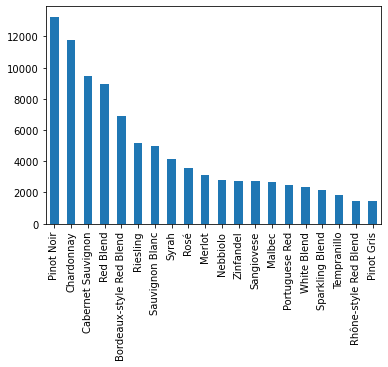

In [7]:
csv_130k['variety'].value_counts().head(20).plot.bar()

#### winery

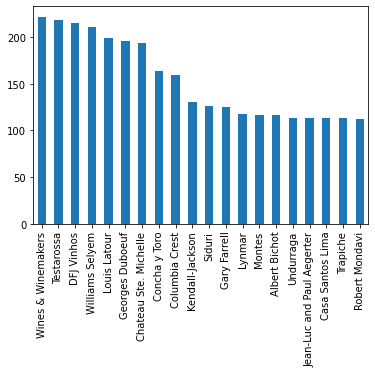

In [8]:
csv_130k['winery'].value_counts().head(20).plot.bar()

### 数值属性
* 数值属性有：points，price
* 5数概括通过`describe()`函数给出（如下所示）： 
  
||min | Q1 | 中位数 | Q3 | max|  
| :-: | :--: | :--: | :--: | :--: | :--: |   
|points | 80 | 86 | 88 | 91 | 100 |  
|price | 4 | 17| 25 | 42 | 3000 | 

* 缺失值的个数通过`info()`函数给出（如下所示）：**points**没有缺失值，**price**缺失值为**8996**个

In [9]:
csv_130k.describe()

,points,price
count,129971.000000,120975.000000
mean,88.447138,35.363389
std,3.039730,41.022218
min,80.000000,4.000000
25%,86.000000,17.000000
50%,88.000000,25.000000
75%,91.000000,42.000000
max,100.000000,3300.000000


In [10]:
pd.DataFrame(csv_130k[['points', 'price']]).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129971 entries, 0 to 129970
Data columns (total 2 columns):
points    129971 non-null int64
price     120975 non-null float64
dtypes: float64(1), int64(1)
memory usage: 3.0 MB


## 数据可视化
### 直方图

#### points

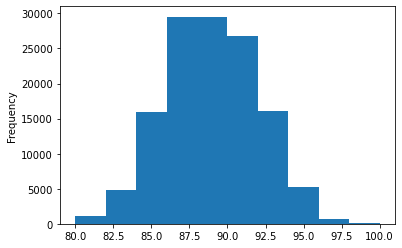

In [11]:
csv_130k['points'].plot.hist()

#### price

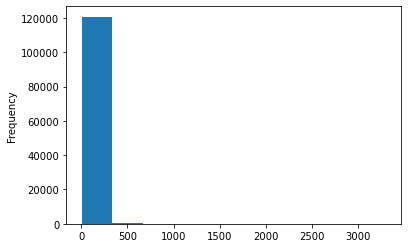

In [12]:
csv_130k['price'].plot.hist()

取price < 200:

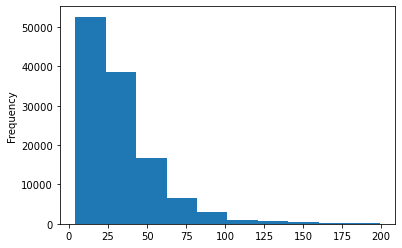

In [13]:
csv_130k[csv_130k["price"]<200]['price'].plot.hist()

### 盒图
#### poins

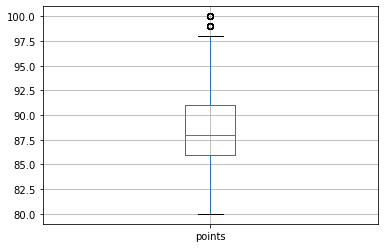

In [14]:
points_130k = pd.DataFrame(csv_130k.points)
points_130k.boxplot(sym = 'o')  # 中间箱体是否缺口) #也可用plot.box()
plt.show()

#### price

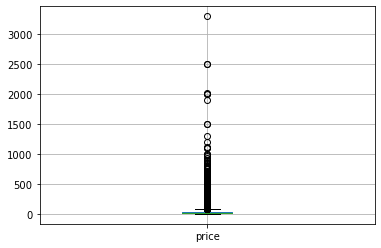

In [15]:
price_130k = pd.DataFrame(csv_130k.price)
price_130k.boxplot(sym = 'o')  # 中间箱体是否缺口) #也可用plot.box()
plt.show()

# 数据缺失的处理
## 观察数据集中缺失数据，分析其缺失的原因。

在此数据集中，存在缺失值的属性有：country、designation、price、province、region_1、region_2、tastre_name、taster_twitter_handle、variety。
* **country**描述了葡萄酒产自哪个国家国家，缺失值个数为63；  
**designation**描述了酿酒的葡萄具体来自酿酒厂内的哪块葡萄园，缺失值个数为37465；  
**province**是指葡萄酒产自的省或州，缺失值个数为63；  
**region_1**为一个省或州的葡萄酒种植区，缺失值个数为21247；  
**region_2**葡萄酒种植区中指定了更具体的区域，但该值有时可以为空，缺失值个数为79460。  
***
这五个属性均为描述葡萄酒产地的属性，存在缺失值的可能原因：评论者对于产地信息不了解，没填写，导致缺失值。  
**country**和**province**缺失值较少，因为一般红酒瓶身/包装通常会标注这两个属性；但其他三个属性对于地域的描述越来越细致，这些信息通常较难从瓶身/包装获取，所以缺失值较多。

* 同样的，在评论系统中，**price**可能为为选填属性，所以造成了缺失。
* **taster_name**和**taster_twitter_handle**缺失，可能是因为匿名评论或者其为选填属性。
* **variety**值缺失一个，可能是异常缺失。

In [16]:
total = csv_130k.isnull().sum().sort_values(ascending = False)
percent = (csv_130k.isnull().sum()/csv_130k.isnull().count()*100).sort_values(ascending = False)
missing_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
region_2,79460,61.136715
designation,37465,28.825661
taster_twitter_handle,31213,24.015357
taster_name,26244,20.192197
region_1,21247,16.347493
price,8996,6.921544
province,63,0.048472
country,63,0.048472
variety,1,0.000769
winery,0,0.000000


分别使用下列四种策略对缺失值进行处理:   
*注意：在处理后，要可视化地对比新旧数据集。*
## 将缺失部分剔除
剔除所有存在缺失值的行后，此数据集还剩下**22387**条数据

In [17]:
dropna_130k = csv_130k.copy(deep=True)
dropna_130k = dropna_130k.dropna()

## 用最高频率值来填补缺失值

对每个属性均使用最高频率值填补缺失值后，可视化：

In [18]:
fillna_130k = csv_130k.copy(deep=True) 

In [19]:
# country
most_country = fillna_130k.country.value_counts().index[0]
fillna_130k.country = fillna_130k.country.fillna(most_country)
# designation
most_designation = fillna_130k.designation.value_counts().index[0]
fillna_130k.designation = fillna_130k.designation.fillna(most_designation)
# price
most_price = fillna_130k.price.value_counts().index[0]
fillna_130k.price = fillna_130k.price.fillna(most_price)
# province
most_province = fillna_130k.province.value_counts().index[0]
fillna_130k.province = fillna_130k.province.fillna(most_province)
# region_1
most_region_1 = fillna_130k.region_1.value_counts().index[0]
fillna_130k.region_1 = fillna_130k.region_1.fillna(most_region_1)
# region_2
most_region_2 = fillna_130k.region_2.value_counts().index[0]
fillna_130k.region_2 = fillna_130k.region_2.fillna(most_region_2)
# variety
most_variety = fillna_130k.variety.value_counts().index[0]
fillna_130k.variety = fillna_130k.variety.fillna(most_variety)

In [20]:
fillna_130k.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129971 entries, 0 to 129970
Data columns (total 13 columns):
country                  129971 non-null object
description              129971 non-null object
designation              129971 non-null object
points                   129971 non-null int64
price                    129971 non-null float64
province                 129971 non-null object
region_1                 129971 non-null object
region_2                 129971 non-null object
taster_name              103727 non-null object
taster_twitter_handle    98758 non-null object
title                    129971 non-null object
variety                  129971 non-null object
winery                   129971 non-null object
dtypes: float64(1), int64(1), object(11)
memory usage: 13.9+ MB


### country、price、variety
* 这三个属性由于缺失值较少，填补前后的可视化结果差别不大。

### designation
* 左边为填补后，右边为填补前：

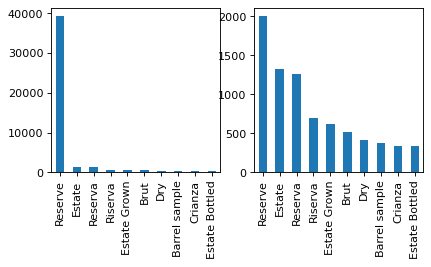

In [21]:
plt.figure(figsize=(6,6), dpi=80)
plt.figure(1)
ax1 = plt.subplot(221)
fillna_130k['designation'].value_counts().head(10).plot.bar()
ax2 = plt.subplot(222)
csv_130k['designation'].value_counts().head(10).plot.bar()

### region_1
* 左边为填补后，右边为填补前：

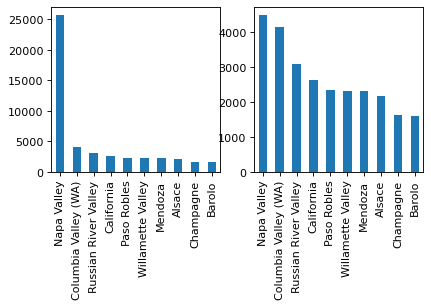

In [22]:
plt.figure(figsize=(6,6), dpi=80)
plt.figure(1)
ax1 = plt.subplot(221)
fillna_130k['region_1'].value_counts().head(10).plot.bar()
ax2 = plt.subplot(222)
csv_130k['region_1'].value_counts().head(10).plot.bar()

### region_2
* 左边为填补后，右边为填补前：

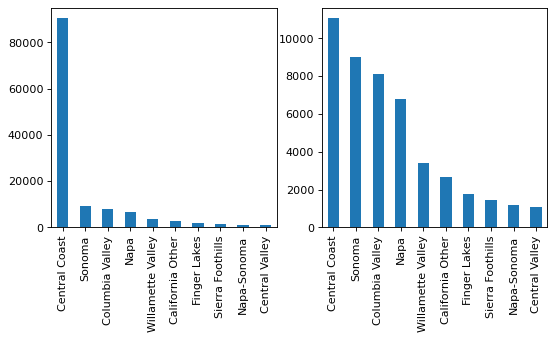

In [23]:
plt.figure(figsize=(8,8), dpi=80)
plt.figure(1)
ax1 = plt.subplot(221)
fillna_130k['region_2'].value_counts().head(10).plot.bar()
ax2 = plt.subplot(222)
csv_130k['region_2'].value_counts().head(10).plot.bar()

### price
直方图左边为填补后，右边为填补前，对比填补缺失值之前，最高频已超过60000：

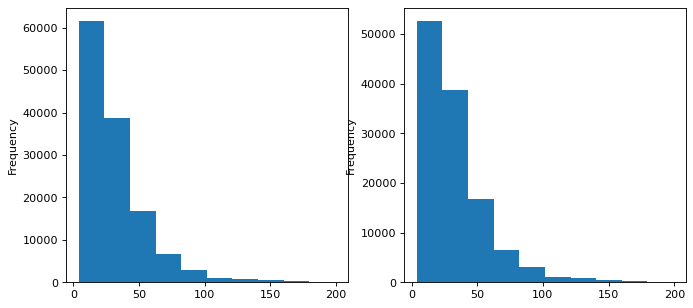

In [24]:
plt.figure(figsize=(10,10), dpi=80)
plt.figure(1)
ax1 = plt.subplot(221)
fillna_130k[fillna_130k["price"]<200]['price'].plot.hist()
ax2 = plt.subplot(222)
csv_130k[csv_130k["price"]<200]['price'].plot.hist()

## 通过属性的相关关系来填补缺失值
### 相关关系 

In [25]:
corr_130k = csv_130k.copy(deep=True)

variety只有一个缺失值，先进行填补：

In [26]:
corr_130k.loc[corr_130k['variety'].isnull(), 'variety'] = 'Cabernet Sauvignon'

In [27]:
# country: nan -> 0
mapping_country = {}
for idx,label in enumerate(set(corr_130k['country'])):
    if pd.isnull(label):
        mapping_country[label] = np.nan
    else:
        mapping_country[label] = idx 
corr_130k['country'] = corr_130k['country'].map(mapping_country)

In [28]:
# province
mapping_province = {}
for idx,label in enumerate(set(corr_130k['province'])):
    if pd.isnull(label):
        mapping_province[label] = np.nan
    else:
        mapping_province[label] = idx 
corr_130k['province'] = corr_130k['province'].map(mapping_province)

In [29]:
# designation
mapping_designation = {}
for idx,label in enumerate(set(corr_130k['designation'])):
    if pd.isnull(label):
        mapping_designation[label] = np.nan
    else:
        mapping_designation[label] = idx 
corr_130k['designation'] = corr_130k['designation'].map(mapping_designation)

In [30]:
# region_1
mapping_region_1 = {}
for idx,label in enumerate(set(corr_130k['region_1'])):
    if pd.isnull(label):
        mapping_region_1[label] = np.nan
    else:
        mapping_region_1[label] = idx 
corr_130k['region_1'] = corr_130k['region_1'].map(mapping_region_1)

In [31]:
# variety
mapping_variety = {}
for idx,label in enumerate(set(corr_130k['variety'])):
    if pd.isnull(label):
        mapping_variety[label] = np.nan
    else:
        mapping_variety[label] = idx 
corr_130k['variety'] = corr_130k['variety'].map(mapping_variety)

In [32]:
# winery
mapping_winery = {}
for idx,label in enumerate(set(corr_130k['winery'])):
    if pd.isnull(label):
        mapping_winery[label] = np.nan
    else:
        mapping_winery[label] = idx
corr_130k['winery'] = corr_130k['winery'].map(mapping_winery)

In [33]:
corr_matrix = corr_130k.corr()
corr_matrix

,country,designation,points,price,province,region_1,variety,winery
country,1.000000,0.011970,0.022415,0.016325,0.161784,-0.102850,-0.089534,0.017069
designation,0.011970,1.000000,-0.003296,0.005311,0.001599,0.001960,-0.013130,-0.000470
points,0.022415,-0.003296,1.000000,0.416167,0.005990,-0.074143,0.131795,0.000416
price,0.016325,0.005311,0.416167,1.000000,-0.008805,-0.044857,0.099249,0.003881
province,0.161784,0.001599,0.005990,-0.008805,1.000000,-0.026787,0.028205,-0.013810
region_1,-0.102850,0.001960,-0.074143,-0.044857,-0.026787,1.000000,-0.050573,-0.017326
variety,-0.089534,-0.013130,0.131795,0.099249,0.028205,-0.050573,1.000000,-0.005101
winery,0.017069,-0.000470,0.000416,0.003881,-0.013810,-0.017326,-0.005101,1.000000


#### Random Forest

In [34]:
from sklearn.ensemble import RandomForestRegressor

def set_missing_ages(df, missing_col, num_feature):
 
    # 把已有的数值型特征取出来丢进Random Forest Regressor中
    _df = df[num_feature]
 
    # 乘客分成已知年龄和未知年龄两部分
    known = _df[_df[missing_col].notnull()].as_matrix()
    unknown = _df[_df[missing_col].isnull()].as_matrix()
 
    # y即目标年龄
    y = known[:, 0]
 
    # X即特征属性值
    X = known[:, 1:]
 
    # fit到RandomForestRegressor之中
    rfr = RandomForestRegressor(random_state=0, n_estimators=2000, n_jobs=-1)
    rfr.fit(X, y)
 
    # 用得到的模型进行未知年龄结果预测
    predicted = rfr.predict(unknown[:, 1:])

    # 用得到的预测结果填补原缺失数据
    df.loc[(df[missing_col].isnull()), missing_col] = predicted 
 
    return df

### country、province
首先查看**country**属性，不难发现，在**country**属性缺失的情况下，**province**也缺失，所以这两个属性的缺失值可以同时填补。 

In [35]:
corr_130k[corr_130k['country'].isnull()].head(2)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
913,NaN,"Amber in color, this wine has aromas of peach ...",120.0,87,30.0,NaN,NaN,NaN,Mike DeSimone,@worldwineguys,Gotsa Family Wines 2014 Asureti Valley Chinuri,113,699
3131,NaN,"Soft, fruity and juicy, this is a pleasant, si...",25870.0,83,NaN,NaN,NaN,NaN,Roger Voss,@vossroger,Barton & Guestier NV Partager Red,634,1669


In [36]:
def newCountry(cols):
    country = cols[0]
    variety = cols[1]
    winery = cols[2]
    if pd.isnull(country):
        a = corr_130k[(corr_130k['variety']==variety) & (corr_130k['winery']==winery)].copy(deep=True)
        a1 = a[a.country.notnull()]
        if len(a1) > 0:
            country1 = a1.iloc[0, 0]
            return country1
        else:
            country1 = corr_130k.country.value_counts().index[0]
            return country1        
    else:
        return country
corr_130k['country'] = corr_130k[['country', 'variety', 'winery']].apply(newCountry, axis=1)

In [37]:
def newProvince(cols):
    province = cols[0]
    variety = cols[1]
    winery = cols[2]
    if pd.isnull(province):
        a = corr_130k[(corr_130k['variety']==variety) & (corr_130k['winery']==winery)].copy(deep=True)
        a1 = a[a.province.notnull()]
        if len(a1) > 0:
            province1 = a1.iloc[0, 5]
            return province1
        else:
            province1 = corr_130k.province.value_counts().index[0]
            return province1        
    else:
        return province
corr_130k['province'] = corr_130k[['province', 'variety', 'winery']].apply(newProvince, axis=1)

填补缺失值后，可视化结果：（由于缺失值较少，所以填补后，可视化结果不是太明显）

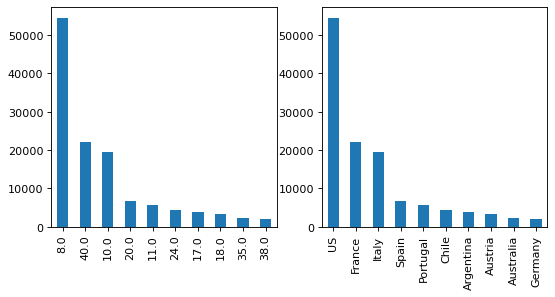

In [38]:
# fillna_130k['country'].value_counts().plot.bar()
plt.figure(figsize=(8,8), dpi=80)
plt.figure(1)
ax1 = plt.subplot(221)
corr_130k['country'].value_counts().head(10).plot.bar()
ax2 = plt.subplot(222)
csv_130k['country'].value_counts().head(10).plot.bar()

### region_1

In [39]:
corr_130k = set_missing_ages(corr_130k, 'region_1', ['region_1','country','province'])

D:\Anaconda3\envs\python36\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':
D:\Anaconda3\envs\python36\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # Remove the CWD from sys.path while we load stuff.


可看到region_1的缺失值已经补全：

In [40]:
corr_130k.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129971 entries, 0 to 129970
Data columns (total 13 columns):
country                  129971 non-null float64
description              129971 non-null object
designation              92506 non-null float64
points                   129971 non-null int64
price                    120975 non-null float64
province                 129971 non-null float64
region_1                 129971 non-null float64
region_2                 50511 non-null object
taster_name              103727 non-null object
taster_twitter_handle    98758 non-null object
title                    129971 non-null object
variety                  129971 non-null int64
winery                   129971 non-null int64
dtypes: float64(5), int64(3), object(5)
memory usage: 13.9+ MB


### designation 
> The vineyard within the winery where the grapes that made the wine are from  

In [41]:
corr_130k = set_missing_ages(corr_130k, 'designation', ['designation','country','region_1'])

D:\Anaconda3\envs\python36\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':
D:\Anaconda3\envs\python36\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # Remove the CWD from sys.path while we load stuff.


In [42]:
corr_130k.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129971 entries, 0 to 129970
Data columns (total 13 columns):
country                  129971 non-null float64
description              129971 non-null object
designation              129971 non-null float64
points                   129971 non-null int64
price                    120975 non-null float64
province                 129971 non-null float64
region_1                 129971 non-null float64
region_2                 50511 non-null object
taster_name              103727 non-null object
taster_twitter_handle    98758 non-null object
title                    129971 non-null object
variety                  129971 non-null int64
winery                   129971 non-null int64
dtypes: float64(5), int64(3), object(5)
memory usage: 13.9+ MB


### price
葡萄酒的价格和**points**有关，所以根据每个points的中位数来补全缺失值：

In [43]:
grouped = corr_130k.groupby(['points'])
# grouped.size()
median = grouped.price.median()
median

points
80      14.0
81      14.0
82      15.0
83      15.0
84      15.0
85      16.0
86      18.0
87      20.0
88      24.0
89      26.0
90      30.0
91      38.0
92      45.0
93      52.0
94      63.0
95      75.0
96      97.0
97     120.0
98     140.0
99     243.5
100    359.0
Name: price, dtype: float64

In [44]:
def newPrice(cols):
    price=cols[0]
    points=cols[1]
    if pd.isnull(price):
        return median[points]
    return price

corr_130k.price = fillna_130k[['price','points']].apply(newPrice,axis=1)

填充完后：

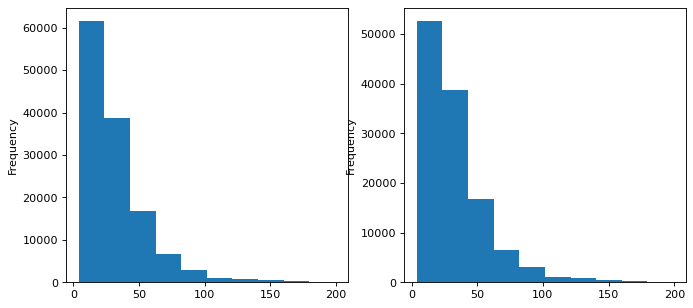

In [45]:
plt.figure(figsize=(10, 10), dpi=80)
plt.figure(1)
ax1 = plt.subplot(221)
corr_130k[corr_130k["price"]<200]['price'].plot.hist()
ax2 = plt.subplot(222)
csv_130k[csv_130k["price"]<200]['price'].plot.hist()

### region_2
region_2属性可以为空，则使用'Unknow'填充。

In [46]:
corr_130k.loc[corr_130k['region_2'].isnull(), 'region_2'] = "Unknown"

## 通过数据对象之间的相似性来填补缺失值 

In [47]:
sim_130k = csv_130k.copy(deep=True)

In [48]:
sim_130k.fillna(method='ffill', inplace=True)

### country、province
这两个属性缺失值较少，可视化对比效果不明显。  
图左为填充后，图右为原数据：

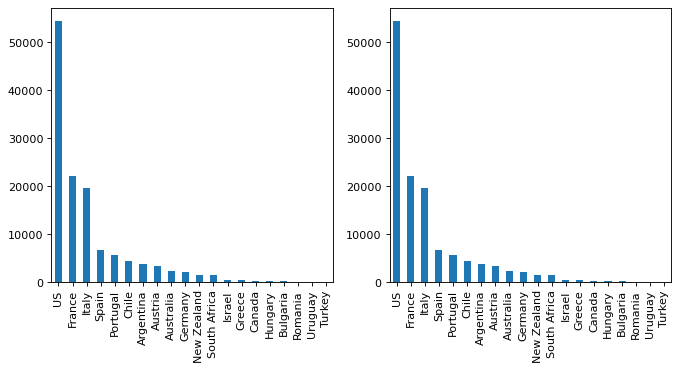

In [49]:
plt.figure(figsize=(10, 10), dpi=80)
plt.figure(1)
ax1 = plt.subplot(221)
sim_130k['country'].value_counts().head(20).plot.bar()
ax2 = plt.subplot(222)
csv_130k['country'].value_counts().head(20).plot.bar()

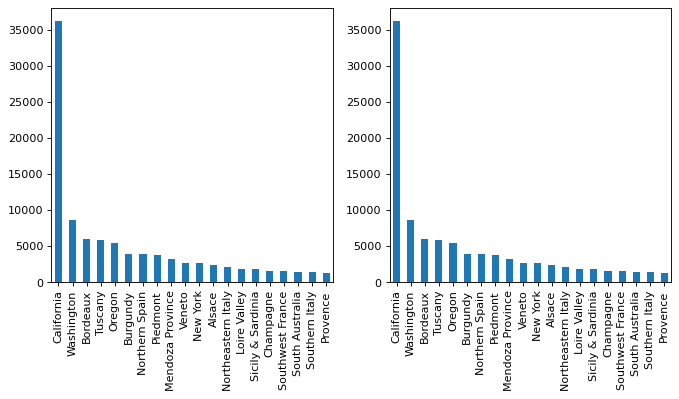

In [114]:
plt.figure(figsize=(10, 10), dpi=80)
plt.figure(1)
ax1 = plt.subplot(221)
sim_130k['province'].value_counts().head(20).plot.bar()
ax2 = plt.subplot(222)
csv_130k['province'].value_counts().head(20).plot.bar()

### designation
图左为填充后，图右为原数据：

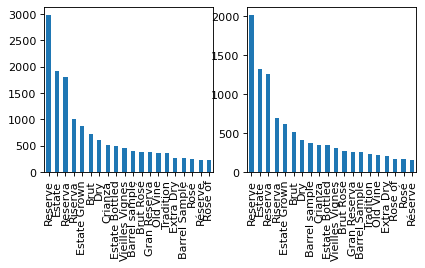

In [50]:
plt.figure(figsize=(6, 6), dpi=80)
plt.figure(1)
ax1 = plt.subplot(221)
sim_130k['designation'].value_counts().head(20).plot.bar()
ax2 = plt.subplot(222)
csv_130k['designation'].value_counts().head(20).plot.bar()

### price
图左为填充后，图右为原数据：

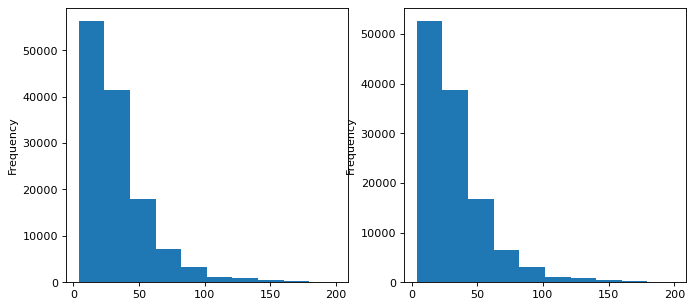

In [51]:
plt.figure(figsize=(10, 10), dpi=80)
plt.figure(1)
ax1 = plt.subplot(221)
sim_130k[sim_130k["price"]<200]['price'].plot.hist()
ax2 = plt.subplot(222)
csv_130k[csv_130k["price"]<200]['price'].plot.hist()

### region_1
图左为填充后，图右为原数据：

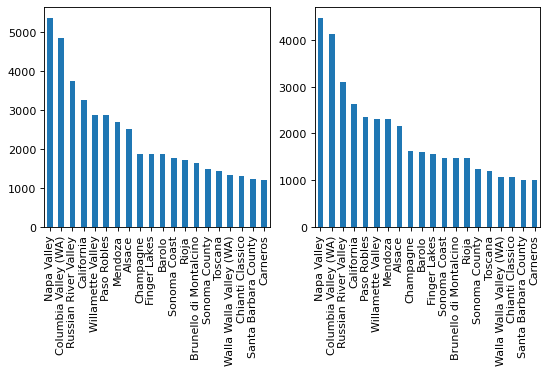

In [52]:
plt.figure(figsize=(8, 8), dpi=80)
plt.figure(1)
ax1 = plt.subplot(221)
sim_130k['region_1'].value_counts().head(20).plot.bar()
ax2 = plt.subplot(222)
csv_130k['region_1'].value_counts().head(20).plot.bar()

### region_2
图左为填充后，图右为原数据：

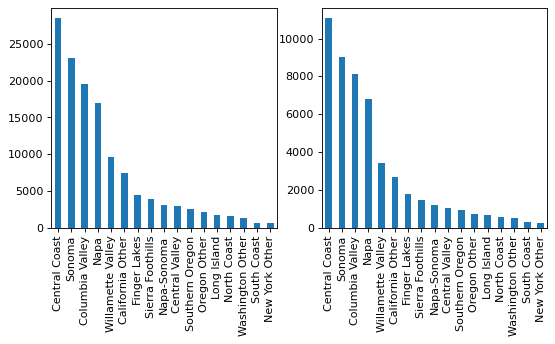

In [53]:
plt.figure(figsize=(8, 8), dpi=80)
plt.figure(1)
ax1 = plt.subplot(221)
sim_130k['region_2'].value_counts().head(20).plot.bar()
ax2 = plt.subplot(222)
csv_130k['region_2'].value_counts().head(20).plot.bar()